# Part 2 - Preprocessing

### 01 - Import library

In [38]:
import os
import numpy as np
import pandas as pd
import librosa
import librosa.display

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 14})

### 02 - Helper function

In [199]:
def wav_to_img(path):
    audio, sr = librosa.load(path,duration=2.97)
    # parameters for calculating spectrogram in mel scale
    fmax = 10000 # maximum frequency considered
    fft_window_points = 512
    fft_window_dur = fft_window_points * 1.0 / sr
    hop_size = int(fft_window_points/ 2) # 50% overlap between consecutive frames
    n_mels = 128
#     audio = librosa.effects.trim(audio, top_db = 55)[0]
    spec = librosa.feature.melspectrogram(audio, sr=sr, n_mels=n_mels, n_fft=fft_window_points, hop_length=hop_size, fmax=fmax)
    spec_gram = librosa.power_to_db(spec, np.max)
    try:
        return librosa.util.pad_center(spec_gram, size = 256, axis = 1)
    except:
        return spec_gram

(128, 256)


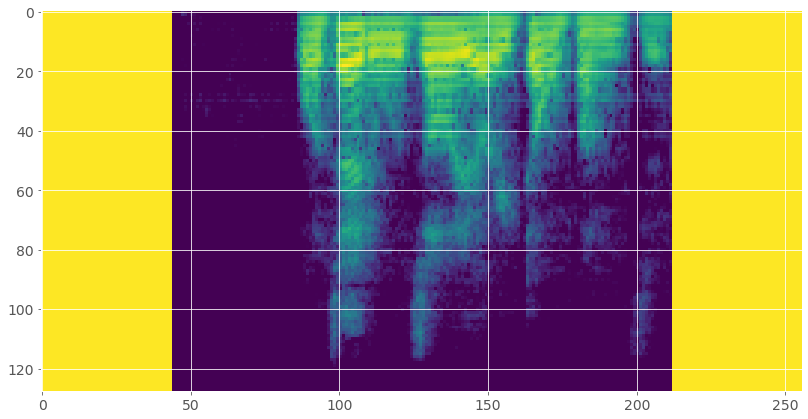

In [202]:
ts_img = wav_to_img('/home/tl/gal/tomayto_tomahto/processed_audio/train/tw/common_voice_zh-TW_17911811.wav')
print(ts_img.shape)
fig, ax = plt.subplots(figsize=(16,7))
ax.imshow(ts_img)

### 03 - Loop it over the entire directory

In [224]:
def picturized(directory1,path1,directory2,path2,empty_list):
    for f in directory1:
        path_to_file = os.path.join(path1,f)
        result = wav_to_img(path_to_file)
        empty_list.append([result,'cn'])
    for f2 in directory2:
        path_to_file2 = os.path.join(path2,f2)
        result = wav_to_img(path_to_file2)
        empty_list.append([result,'tw'])
    return empty_list

In [237]:
vectorized = []
directory1 = os.listdir('/home/tl/gal/tomayto_tomahto/processed_audio/hold_out/cn/')
path1 = '/home/tl/gal/tomayto_tomahto/processed_audio/hold_out/cn/'
directory2 = os.listdir('/home/tl/gal/tomayto_tomahto/processed_audio/hold_out/tw/')
path2 = '/home/tl/gal/tomayto_tomahto/processed_audio/hold_out/tw/'
result = picturized(directory1,path1,directory2,path2,vectorized)
df2 = pd.DataFrame(result,columns=['features','lang'])

Save the "pictures" dataframe into a pickle file

In [239]:
# df2.to_pickle('hold_out.pkl')

check if the pickle works

In [228]:
# df1 = pd.read_pickle('../pickles/train.pkl')